In [476]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [301]:
# Load the dataset
df = pd.read_csv("train.csv")

In [303]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [305]:
# Basic information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [307]:
# Display descriptive statistics
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [309]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [311]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display percentage of missing values for each column
print(missing_percentage[missing_percentage > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [313]:
# Drop columns with more than 50% NaN values
threshold = 0.5
df_cleaned = df.dropna(axis=1, thresh=int((1-threshold) * len(df)))

# Check the remaining columns
print(df_cleaned.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [315]:
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [410]:
# Handling Missing Data
# missing numerical values with the median or mean, and encode categorical variables using One-Hot Encoding or Label Encoding.
# Fill missing numerical values with median
df.fillna(df.median(), inplace=True)

In [412]:
# Encode categorical features with One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [319]:
df.fillna(df.mean(), inplace=True)  # Impute missing numerical values with mean

In [414]:
#Feature Scaling and Transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical features for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


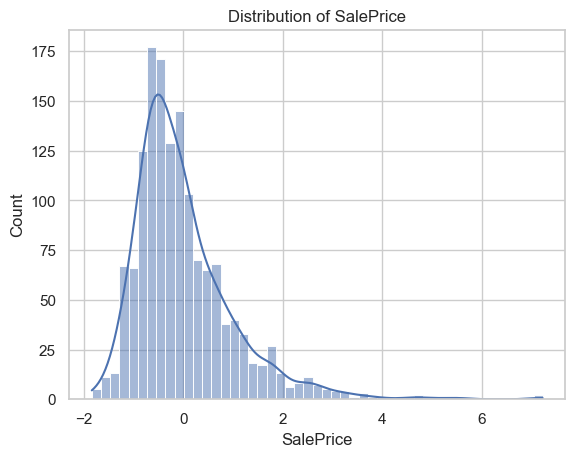

In [418]:
# Distribution of SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

/Users/Surface1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


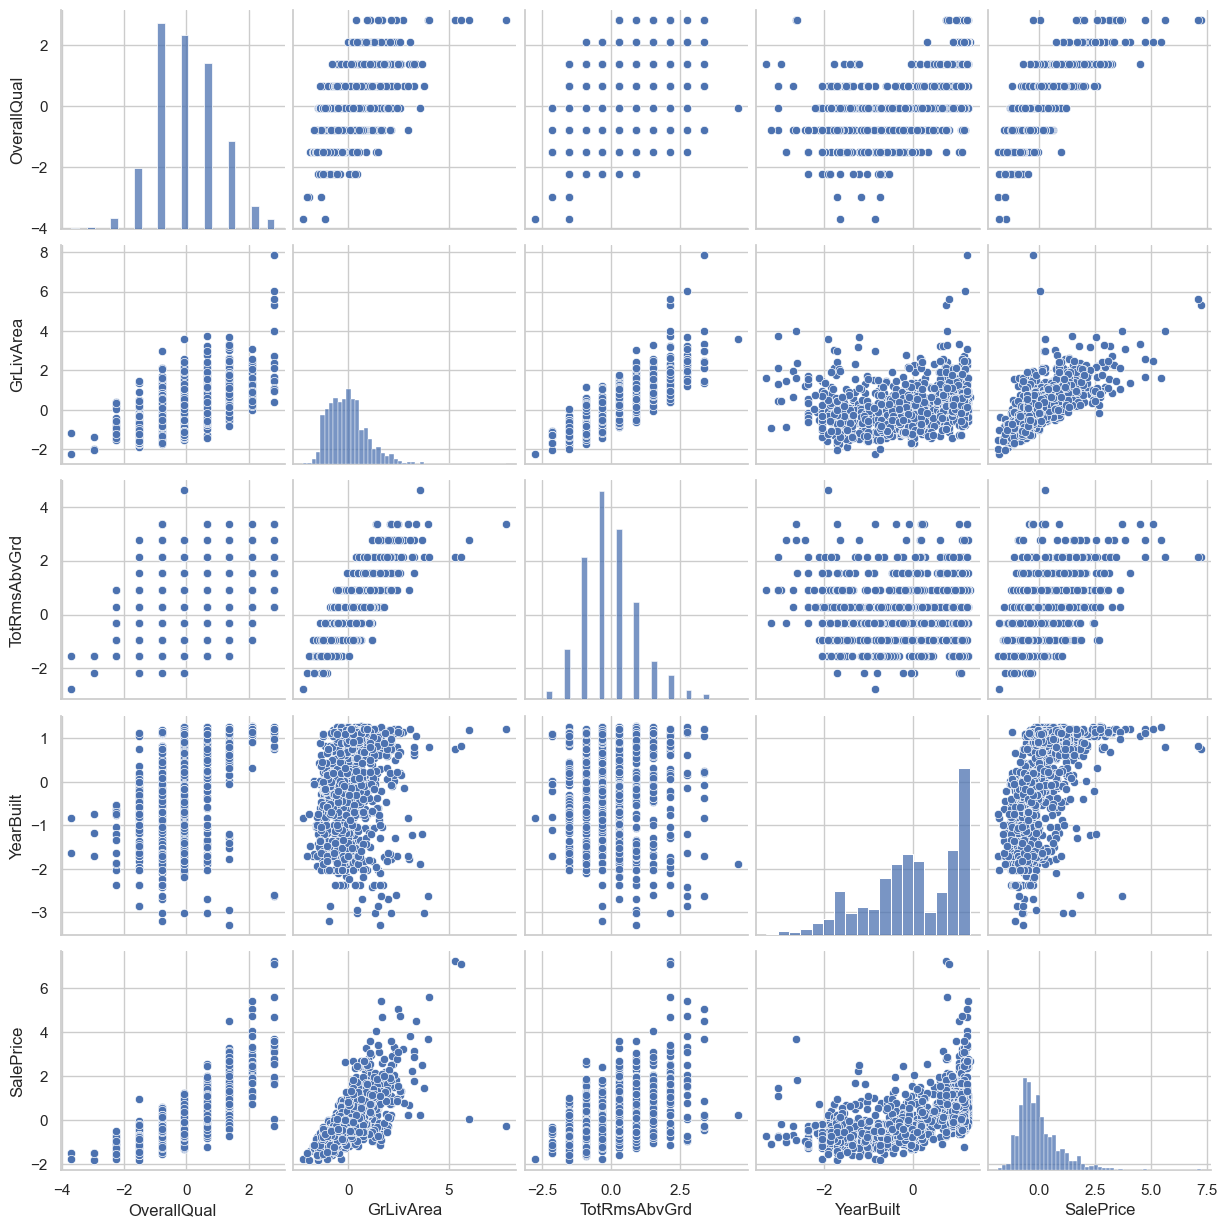

In [442]:
# Pairplot between numerical variables and SalePrice
sns.pairplot(df, vars=['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice'])

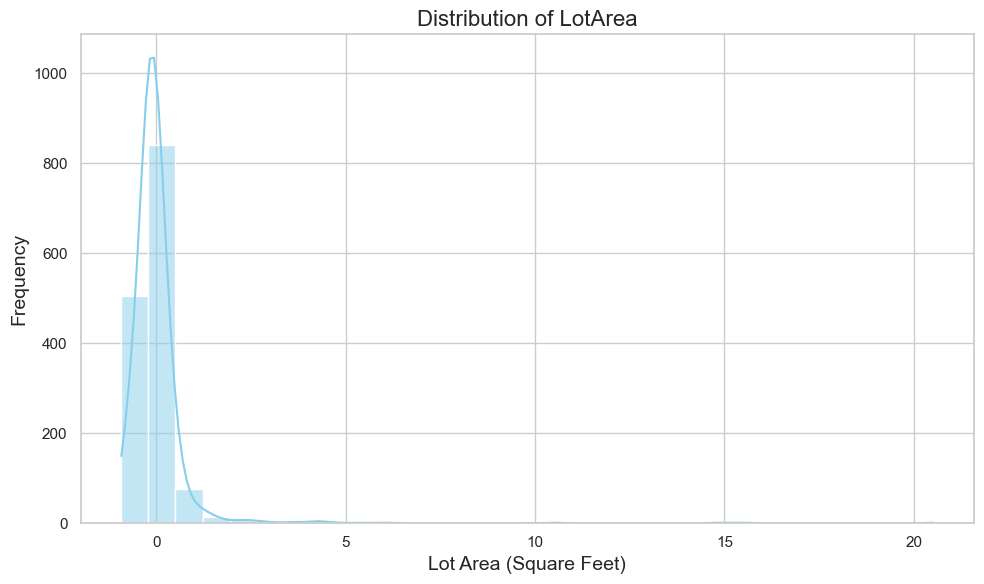

In [443]:
sns.set(style="whitegrid")

# Example for plotting a clearer histogram for 'LotArea' (or any numerical column you choose)
plt.figure(figsize=(10, 6))  # Increase the figure size for better readability
sns.histplot(df['LotArea'], kde=True, color='skyblue', bins=30)  # Add Kernel Density Estimate (KDE) for smoothness

# Add labels and title
plt.title('Distribution of LotArea', fontsize=16)
plt.xlabel('Lot Area (Square Feet)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show gridlines and adjust layout for clarity
plt.grid(True)
plt.tight_layout()


In [453]:
import scipy.stats as stats

# Example t-test between categories of OverallQual
group_1 = df[df['OverallQual'] == 10]['SalePrice']
group_2 = df[df['OverallQual'] == 1]['SalePrice']

t_stat, p_value = stats.ttest_ind(group_1, group_2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


In [461]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")


Linear Regression Mean Squared Error: 658804295918009.0


In [466]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 0.1315078015109801


In [469]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor()

# Fit the model
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")


Gradient Boosting Mean Squared Error: 0.1194671574300192


In [473]:
# Model Comparison and Conclusion
print("Linear Regression MSE:", mse)
print("Random Forest MSE:", mse_rf)
print("Gradient Boosting MSE:", mse_gb)


Linear Regression MSE: 658804295918009.0
Random Forest MSE: 0.1315078015109801
Gradient Boosting MSE: 0.1194671574300192


In [ ]:
#The model with the lowest Mean Squared Error (MSE) will likely be the best performing. 
# However, R² score, cross-validation, and hyperparameter tuning are important next steps to refine the model.